In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Flatten,Dropout,Dense,BatchNormalization,Reshape

In [2]:
import os

x_train=[]
y_train=[]
x_test=[]
y_test=[]

path_train_low='../dataSets/ref/our485/low/'
path_train_high='../dataSets/ref/our485/high/'
path_test_low='../dataSets/ref/eval15/low/'
path_test_high='../dataSets/ref/eval15/high/'

print('\nLoding Train dataset :')
i=0;
for img in os.listdir(path_train_low):
    img_low_path=os.path.join(path_train_low, img)
    img_high_path=os.path.join(path_train_high, img)
    
    img_low=load_img(img_low_path, target_size=(50,50))
    img_low=img_to_array(img_low)/255.
    
    i=i+1
    print("{:.2f}".format(i/4.89)+' %',end='\r')
    
    img_high=load_img(img_high_path, target_size=(50,50))
    img_high=img_to_array(img_high)/255.
    
    x_train.append(img_low)
    y_train.append(img_high)
    
print('\nLoding Test dataset :')
i=0;
for img in os.listdir(path_test_low):
    img_low_path=os.path.join(path_test_low, img)
    img_high_path=os.path.join(path_test_high, img)
    
    img_low=load_img(img_low_path, target_size=(50,50))
    img_low=img_to_array(img_low)/255.
    
    i=i+1
    print("{:.2f}".format(i/0.14)+' %',end='\r')
    
    img_high=load_img(img_high_path, target_size=(50,50))
    img_high=img_to_array(img_high)/255.
    
    x_test.append(img_low)
    y_test.append(img_high)

x_train=np.array(x_train, dtype="float32")
y_train=np.array(y_train, dtype="float32")

x_test=np.array(x_test, dtype="float32")
y_test=np.array(y_test, dtype="float32")


Loding Train dataset :
100.00 %
Loding Test dataset :


In [3]:
model=Sequential()

model.add(UpSampling2D((2,2),input_shape=(50,50,3)))
model.add(Conv2D(64,(5,5),padding='same',activation='relu'))
model.add(Conv2D(32,(3,3),padding='same',activation='elu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(50*50,activation='elu'))
model.add(Dense(3*50*50,activation='sigmoid'))
model.add(Reshape((50,50,3)))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d (UpSampling2D) (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 100, 64)      4864      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 80000)             0         
_________________________________________________________________
dense (Dense)                (None, 2500)              200002500 
_________________________________________________________________
dense_1 (Dense)              (None, 7500)              1

In [4]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint=ModelCheckpoint('models/ref/ref_cnn_mod.h5',
                            monitor='val_loss',
                            mode='min',
                            save_best_only=True,
                            verbose=1
                          )
earlystop=EarlyStopping(monitor='val_loss',
                        patience=6,
                        min_delta=0,
                        restore_best_weights=True,
                        verbose=1
                       )
reduce_lr=ReduceLROnPlateau(monitor='val_loss',
                            factor=0.2,
                            patience=6,
                            min_delta=0.0001,
                            verbose=1
                           )
callbacks=[checkpoint,earlystop,reduce_lr]

model.compile(loss=keras.losses.MeanSquaredError(),
              optimizer='adam',
              metrics=['accuracy']
             )

history=model.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=100,
    validation_data=(x_test, y_test),
    callbacks=callbacks
    )

Epoch 1/100
16/16 [==============================] - ETA: 0s - loss: 0.0476 - accuracy: 0.4098
Epoch 00001: val_loss improved from inf to 0.04645, saving model to models/ref\ref_cnn_mod.h5
16/16 [==============================] - 73s 5s/step - loss: 0.0476 - accuracy: 0.4098 - val_loss: 0.0464 - val_accuracy: 0.3255
Epoch 2/100
16/16 [==============================] - ETA: 0s - loss: 0.0383 - accuracy: 0.4262
Epoch 00002: val_loss improved from 0.04645 to 0.04031, saving model to models/ref\ref_cnn_mod.h5
16/16 [==============================] - 71s 4s/step - loss: 0.0383 - accuracy: 0.4262 - val_loss: 0.0403 - val_accuracy: 0.4169
Epoch 3/100
16/16 [==============================] - ETA: 0s - loss: 0.0320 - accuracy: 0.4434
Epoch 00003: val_loss improved from 0.04031 to 0.03313, saving model to models/ref\ref_cnn_mod.h5
16/16 [==============================] - 107s 7s/step - loss: 0.0320 - accuracy: 0.4434 - val_loss: 0.0331 - val_accuracy: 0.4197
Epoch 4/100
16/16 [==================

In [7]:
history=model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=callbacks
    )

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 1.8399e-04 - accuracy: 0.9152
Epoch 00001: val_loss did not improve from 0.00754
8/8 [==============================] - 32s 4s/step - loss: 1.8399e-04 - accuracy: 0.9152 - val_loss: 0.0079 - val_accuracy: 0.8555
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 1.8151e-04 - accuracy: 0.9160
Epoch 00002: val_loss did not improve from 0.00754
8/8 [==============================] - 32s 4s/step - loss: 1.8151e-04 - accuracy: 0.9160 - val_loss: 0.0079 - val_accuracy: 0.8556
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 1.7829e-04 - accuracy: 0.9171
Epoch 00003: val_loss did not improve from 0.00754
8/8 [==============================] - 32s 4s/step - loss: 1.7829e-04 - accuracy: 0.9171 - val_loss: 0.0079 - val_accuracy: 0.8561
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 1.7527e-04 - accuracy: 0.9180
Epoch 00004: val_loss did not improve from 0.00754
8/8 [==============

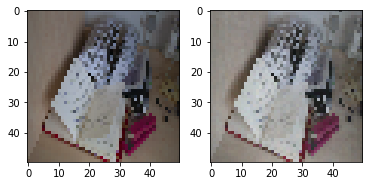

In [11]:
fig=plt.figure();

def check_result(n):
    fig.add_subplot(1,2,1).imshow(y_test[n])
    fig.add_subplot(1,2,2).imshow(model.predict(x_test)[n])

check_result(6);

In [ ]:
plt.imshow(Conv2D(3,(1,1),padding='same',activation='elu')(x_test)[3])